In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
new_data = pd.read_csv("clean_sales_data.csv")

# Basic Descriptive Analysis

- What is the total number of unique customers and products?

- What is the overall total revenue (Quantity × UnitPrice)?
- Goal: Practice summarizing key metrics.

In [4]:
new_data['CustomerID'].nunique()

4372

In [5]:
new_data['Description'].nunique()

1634

In [6]:
sales =(new_data['Quantity']>0).sum()
sales

np.int64(4194)

In [7]:
return_product = (new_data['Quantity']<0).sum()
return_product

np.int64(178)

In [8]:
new_data['Revenue']=(new_data['UnitPrice'] * new_data['Quantity'])


In [9]:
new_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08
2,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,90.00
3,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom,204.00
4,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom,350.40


In [10]:
new_data['Revenue'].sum()

np.float64(224541.82)

In [11]:
total_sales_revenue = new_data[new_data['Quantity'] > 0]['Revenue'].sum()
total_sales_revenue


np.float64(238970.65000000002)

In [12]:
total_returns_revenue = new_data[new_data['Quantity'] < 0]['Revenue'].sum()
total_returns_revenue

np.float64(-14428.830000000002)

In [13]:
new_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08
2,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,90.00
3,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom,204.00
4,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom,350.40


# Time Series Exploration

- Analyze sales over time — identify monthly sales trends. Which month had the highest revenue?
- Goal: Learn grouping and date-time analysis.

In [14]:
new_data['InvoiceDate']=pd.to_datetime(new_data['InvoiceDate'])

In [15]:
new_data['yearMonth']=new_data['InvoiceDate'].dt.to_period('M')

In [16]:
new_data[['yearMonth','Revenue']]

,yearMonth,Revenue
0,2010-12,15.30
1,2010-12,54.08
2,2010-12,90.00
3,2010-12,204.00
4,2010-12,350.40
...,...,...
4367,2011-12,11.70
4368,2011-12,10.20
4369,2011-12,90.00
4370,2011-12,1.95


In [17]:
monthly_revenue = new_data.groupby('yearMonth')['Revenue'].sum().reset_index()
monthly_revenue = monthly_revenue.sort_values('yearMonth')
print(monthly_revenue.head(10))


  yearMonth   Revenue
0   2010-12  37490.76
1   2011-01  94023.75
2   2011-02  12678.99
3   2011-03  12315.84
4   2011-04   9175.71
5   2011-05  12532.37
6   2011-06   7794.26
7   2011-07  -1733.33
8   2011-08   5000.30
9   2011-09  11005.20


In [18]:
monthly_revenue.max()


yearMonth     2011-12
Revenue      94023.75
dtype: object

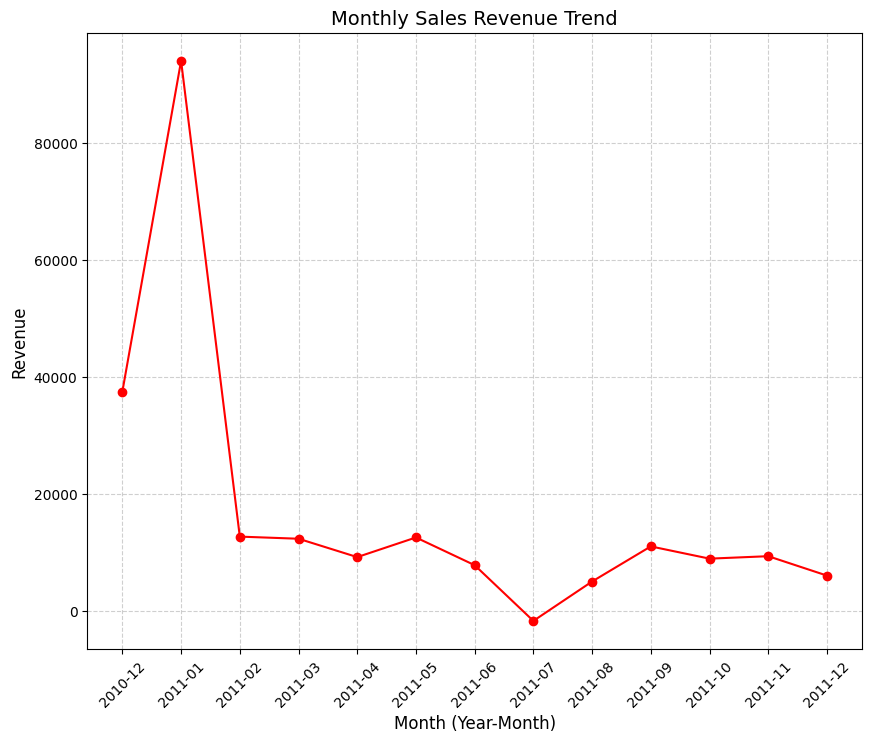

In [19]:
plt.figure(figsize=(10,8))  
plt.plot(monthly_revenue['yearMonth'].astype(str), monthly_revenue['Revenue'], marker='o', linestyle='-', color='r')


plt.title('Monthly Sales Revenue Trend', fontsize=14)
plt.xlabel('Month (Year-Month)', fontsize=12)
plt.ylabel('Revenue', fontsize=12)


plt.xticks(rotation=45)


plt.grid(True, linestyle='--', alpha=0.6)

# plt.ylim(0,100000)

plt.show()


# Country Insights
- Find the top 5 countries with the highest total revenue (excluding the UK). Goal: Analyze categorical data and sorting.

In [20]:
actual_sale = new_data[new_data['Quantity']>0]

In [21]:
notuk = new_data[new_data['Country']!= 'United Kingdom']

In [22]:
country_revenue = notuk.groupby('Country')['Revenue'].sum().reset_index()

In [23]:
country_revenue=country_revenue.sort_values(by='Revenue',ascending=False)

In [24]:
Top_country=country_revenue[['Country','Revenue']]

In [25]:
top5=Top_country.head(5)
top5

,Country,Revenue
19,Japan,4553.99
14,Germany,3133.72
13,France,2208.55
9,Denmark,763.20
6,Channel Islands,722.17


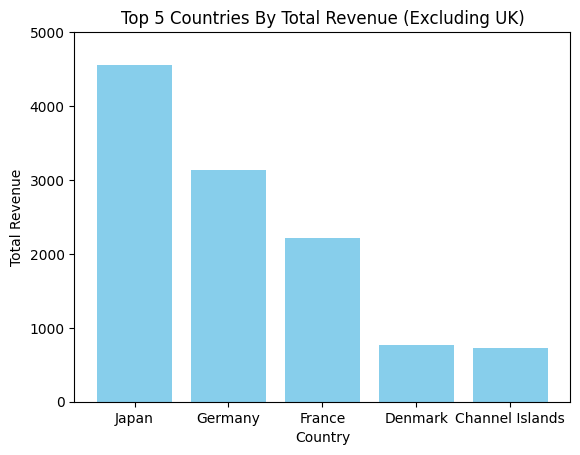

In [26]:
plt.Figure(figsize=(10,8))
plt.bar(top5['Country'],top5['Revenue'],color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top 5 Countries By Total Revenue (Excluding UK)')
plt.ylim(0,5000)
plt.show()

# Product Performance
- What are the top 10 most sold products by quantity? Goal: Explore frequency distributions.

In [27]:
product_sales = (
    new_data[new_data['Quantity'] > 0]
    .groupby('Description', as_index=False)['Quantity'].sum()
    .sort_values(by='Quantity', ascending=False)
)


In [28]:
Top_Product_sales=product_sales[['Description','Quantity']]

In [29]:
top10=Top_Product_sales.head(10)

In [30]:
top10

,Description,Quantity
835,MEDIUM CERAMIC TOP STORAGE JAR,74311
110,ASSTD DESIGN 3D PAPER STICKERS,12540
1573,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5952
1353,SMALL POPCORN HOLDER,4672
1526,WHITE HANGING HEART T-LIGHT HOLDER,3222
465,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400
1344,SMALL CHINESE STYLE SCISSOR,2000
102,ASSORTED COLOUR T-LIGHT HOLDER,1824
911,PACK OF 12 LONDON TISSUES,1806
106,ASSORTED LAQUERED INCENSE HOLDERS,1728


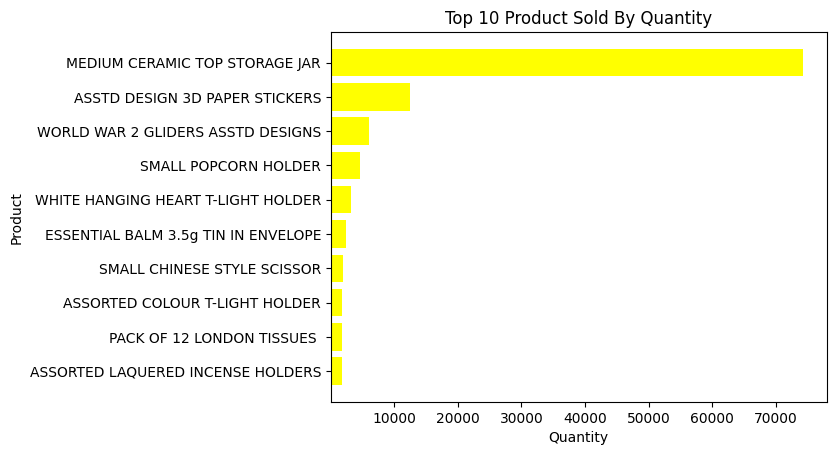

In [31]:
plt.Figure(figsize=(10,8))
plt.barh(top10['Description'],top10['Quantity'],color='yellow')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.title('Top 10 Product Sold By Quantity')
plt.gca().invert_yaxis()
plt.xlim(0.80000)
plt.show()


# Customer Behavior
- Identify the top 10 customers by revenue. Goal: Perform grouping and aggregation by customers.

In [32]:
customer =new_data.groupby('CustomerID',as_index=False)['Revenue'].sum()

In [33]:
top_customer=customer.sort_values(by='Revenue',ascending=False)

In [34]:
top_cus=top_customer.head(10)

In [35]:
top_cus

,CustomerID,Revenue
0,12346.0,77183.60
2522,15749.0,4921.50
2103,15195.0,3861.00
336,12755.0,3794.40
603,13135.0,3096.00
4045,17846.0,2033.10
4233,18102.0,1950.24
3096,16532.0,1910.40
4125,17949.0,1314.00
2698,16000.0,1190.40


/var/folders/mq/8k37xryj0_n2cz69zl90f1gm0000gn/T/ipykernel_1882/72497169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cus['CustomerID'] = top_cus['CustomerID'].astype(str)


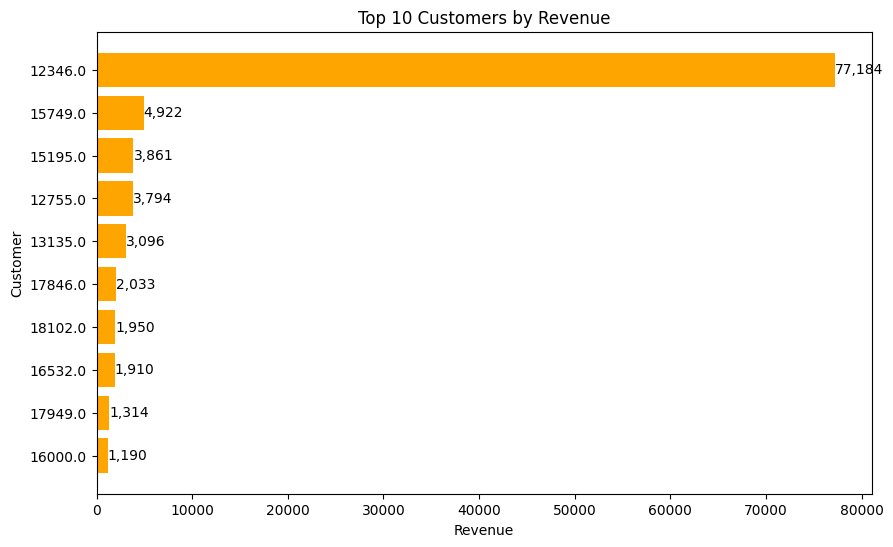

In [36]:
top_cus['CustomerID'] = top_cus['CustomerID'].astype(str)  

plt.figure(figsize=(10,6))
plt.barh(top_cus['CustomerID'], top_cus['Revenue'], color='orange')
plt.xlabel('Revenue')
plt.ylabel('Customer')
plt.title('Top 10 Customers by Revenue')
plt.gca().invert_yaxis() 
for index, value in enumerate(top_cus['Revenue']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.show()


# Quantities and Positive 
- Find how many transactions have negative  and positive quantities. What might that indicate? Goal: Understand data anomalies and business interpretation.

In [37]:
positive_count = (new_data['Quantity'] > 0).sum()

In [38]:
negative_count = (new_data['Quantity'] < 0).sum()

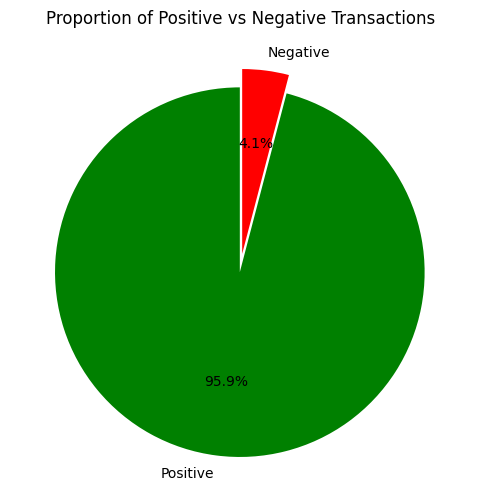

In [39]:

counts = [positive_count, negative_count]
labels = ['Positive', 'Negative']
colors = ['green', 'red']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.05,0.05))
plt.title('Proportion of Positive vs Negative Transactions')
plt.show()

In [40]:
new_data.to_csv('clean_data.csv', index=False)
